# Creating a Streamplot

## Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

Basic CSV import. Pre-loading, the data table should be periods as rows, countries as columns.

In [2]:
prep = pd.read_csv('data/PrEP_2023.csv')
prep.head()

,Period,Botswana,Burundi,Cote D'Ivoire,Kenya,Lesotho,Malawi,Mozambique,Namibia,Nigeria,Tanzania,West Africa Region,Zambia
0,4/29/2017,NaN,NaN,NaN,322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/28/2017,NaN,NaN,NaN,3102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/26/2017,NaN,NaN,NaN,4462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/24/2018,NaN,NaN,NaN,6852.0,9.0,NaN,NaN,76.0,NaN,NaN,NaN,NaN
4,4/24/2018,NaN,NaN,NaN,6529.0,410.0,NaN,NaN,87.0,NaN,NaN,NaN,NaN


## Transform

Fix the `NaN`s (blank cells) to zeroes

In [3]:
prep = prep.fillna(0)

Make sure the Period column is a `datetime` type, and set as the index.

In [4]:
prep['Period'] = pd.to_datetime(prep['Period'])
prep = prep.set_index('Period')
prep.head()

,Botswana,Burundi,Cote D'Ivoire,Kenya,Lesotho,Malawi,Mozambique,Namibia,Nigeria,Tanzania,West Africa Region,Zambia
Period,,,,,,,,,,,,
2017-04-29,0.0,0.0,0.0,322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-28,0.0,0.0,0.0,3102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-26,0.0,0.0,0.0,4462.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-24,0.0,0.0,0.0,6852.0,9.0,0.0,0.0,76.0,0.0,0.0,0.0,0.0
2018-04-24,0.0,0.0,0.0,6529.0,410.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0


Make fake rows with interpolated data for the purposes of smoothing

In [5]:
first = prep.index.min()
last = prep.index.max()
frequency = pd.date_range(start=first, end=last, freq='30D')

In [6]:
smooth = prep.reindex(frequency).interpolate(method='quadratic')
smooth.head()

,Botswana,Burundi,Cote D'Ivoire,Kenya,Lesotho,Malawi,Mozambique,Namibia,Nigeria,Tanzania,West Africa Region,Zambia
2017-04-29,0.000000e+00,0.000000e+00,0.000000e+00,322.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2017-05-29,-5.192684e-10,-1.537552e-11,-3.976035e-16,1466.499205,-0.956755,2.538573e-10,-1.699090e-08,1.966471,-8.031048e-07,0.693682,-2.635184e-12,-4.303168e-10
2017-06-28,-5.192684e-10,-1.537552e-11,-3.976035e-16,2393.165871,-0.956755,2.538573e-10,-1.699090e-08,1.966471,-8.031048e-07,0.693682,-2.635184e-12,-4.303168e-10
2017-07-28,0.000000e+00,0.000000e+00,0.000000e+00,3102.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2017-08-27,1.038537e-09,3.075103e-11,7.952070e-16,3593.001590,1.913510,-5.077147e-10,3.398180e-08,-3.932943,1.606210e-06,-1.387364,5.270367e-12,8.606337e-10


## Plot

In [7]:
color = ['#00667d', '#26cad3', '#5ac4ff', '#e95a47', '#bd1958', '#62125c', '#b79b00', '#f0dc5b', '#008869', '#6F9394', '#00cda4', '#d8bdea']

What's going on here?
- This is a stackplot in `matplotlib`, which == a stacked area chart
- The parameter `baseline = 'sym'` makes the data accurately stack on both sides of the x axis rather than start at zeroes
- Using the smooth data rather than the raw data gives this an aethetically pleasing non-spikiness

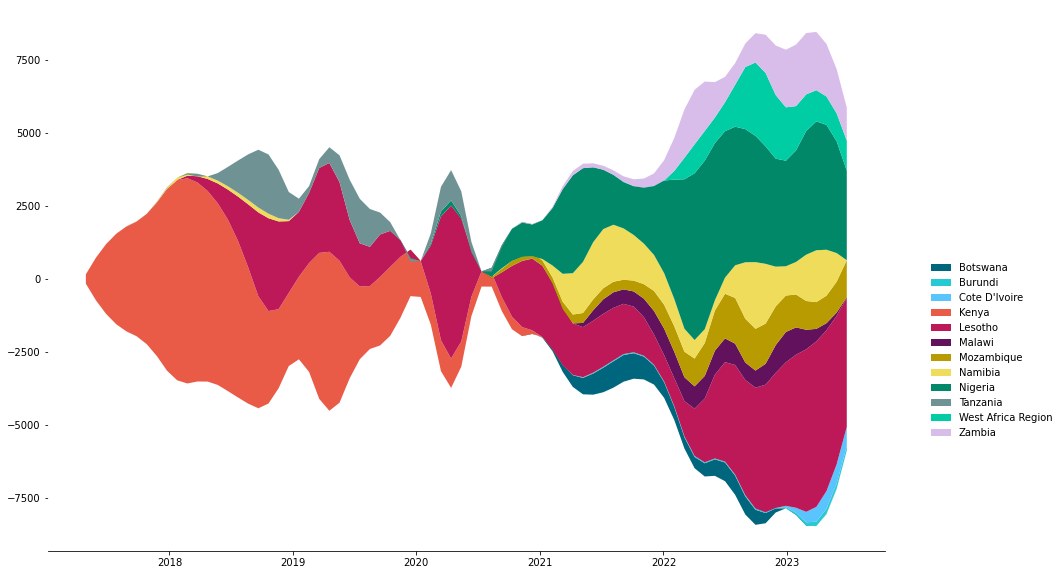

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.stackplot(smooth.index, smooth.T, baseline='sym',labels=smooth.columns, colors=color)
ax.spines['left'].set_color('#ffffff')
ax.spines['right'].set_color('#ffffff')
ax.spines['top'].set_color('#ffffff')
ax.legend(loc=(1.05,0.2)).get_frame().set_linewidth(0.0)
plt.savefig("prep-stream-edit.pdf", transparent=True);